# 🧩 Mini-Lab: Attention Visualization

**Module 2: Understanding Large Language Models** | **Duration: ~30 min** | **Type: Mini-Lab (Brick)**

---

## Learning Objectives

By the end of this mini-lab, you will be able to:

1. **Understand** how attention scores measure token-to-token relevance
2. **Visualize** attention patterns in a simple self-attention mechanism
3. **Interpret** what attention heatmaps reveal about token relationships

## Target Concepts

| Concept | Description |
|---------|-------------|
| Self-Attention | Mechanism allowing tokens to attend to other tokens in a sequence |
| Attention Scores | Computed relevance values between query and key tokens (pre-softmax logits) |

## 1. Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

def md(text):
    """Display text as rendered markdown."""
    display(Markdown(text))

np.set_printoptions(precision=3, suppress=True)
print("✓ Setup complete")

✓ Setup complete


## 2. Self-Attention: The Core Mechanism

Self-attention computes how much each token should "pay attention" to every other token:

$$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$$

- **Q (Query)**: What this token is looking for
- **K (Key)**: What each token offers
- **V (Value)**: The information to retrieve

In [2]:
def softmax(x, axis=-1):
    """Stable softmax implementation."""
    x = x - np.max(x, axis=axis, keepdims=True)
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=axis, keepdims=True)

def self_attention(Q, K, V, mask=None):
    """Compute scaled dot-product attention."""
    d_k = Q.shape[-1]
    
    # Step 1: Compute attention scores (raw)
    scores = (Q @ K.T) / np.sqrt(d_k)
    
    # Step 2: Apply mask if provided (for causal attention)
    if mask is not None:
        scores = np.where(mask, -1e9, scores)
    
    # Step 3: Apply softmax to get attention weights
    weights = softmax(scores, axis=-1)
    
    # Step 4: Weighted sum of values
    output = weights @ V
    
    return output, weights, scores

print("✓ Self-attention function defined")

✓ Self-attention function defined


## 3. Visualizing Attention on a Simple Sentence

In [3]:
# Simulated tokens
tokens = ["The", "cat", "sat", "on", "the", "mat"]
seq_len = len(tokens)
d_model = 4  # Small embedding dimension for clarity

# Simulate embeddings (in practice, these come from learned embeddings)
np.random.seed(42)
embeddings = np.random.randn(seq_len, d_model)

# For simplicity, Q = K = V = embeddings (as in basic self-attention)
Q = K = V = embeddings

# Compute attention
output, weights, scores = self_attention(Q, K, V)

print("Tokens:", tokens)
print(f"\nAttention Scores (raw, pre-softmax):")
print(scores)
print(f"\nAttention Weights (post-softmax, rows sum to 1):")
print(weights)
print(f"\nRow sums (should be ~1):", weights.sum(axis=1))

Tokens: ['The', 'cat', 'sat', 'on', 'the', 'mat']

Attention Scores (raw, pre-softmax):
[[ 1.502  1.054 -0.659 -0.794 -1.643 -0.683]
 [ 1.054  1.596 -0.553 -1.382 -1.177 -0.639]
 [-0.659 -0.553  0.473 -0.045  0.862 -0.089]
 [-0.794 -1.382 -0.045  3.505  0.757  0.736]
 [-1.643 -1.177  0.862  0.757  1.972  0.198]
 [-0.683 -0.639 -0.089  0.736  0.198  2.117]]

Attention Weights (post-softmax, rows sum to 1):
[[0.498 0.318 0.057 0.05  0.021 0.056]
 [0.303 0.521 0.061 0.027 0.033 0.056]
 [0.075 0.083 0.231 0.138 0.341 0.132]
 [0.012 0.006 0.024 0.85  0.054 0.053]
 [0.014 0.023 0.177 0.159 0.536 0.091]
 [0.037 0.039 0.067 0.154 0.09  0.613]]

Row sums (should be ~1): [1. 1. 1. 1. 1. 1.]


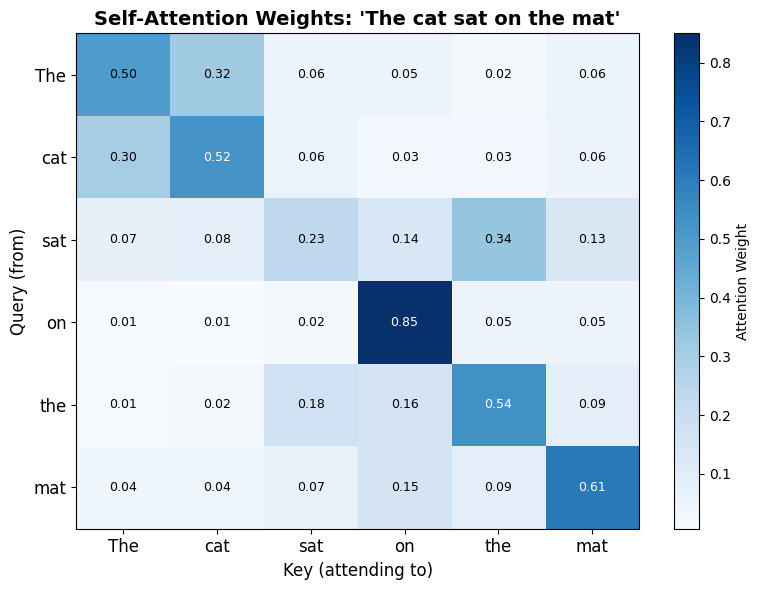

In [4]:
def plot_attention(weights, tokens, title="Attention Weights"):
    """Visualize attention weights as a heatmap."""
    fig, ax = plt.subplots(figsize=(8, 6))
    
    im = ax.imshow(weights, cmap='Blues', aspect='auto')
    
    # Set ticks
    ax.set_xticks(range(len(tokens)))
    ax.set_yticks(range(len(tokens)))
    ax.set_xticklabels(tokens, fontsize=12)
    ax.set_yticklabels(tokens, fontsize=12)
    
    # Labels
    ax.set_xlabel("Key (attending to)", fontsize=12)
    ax.set_ylabel("Query (from)", fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    
    # Add colorbar
    plt.colorbar(im, ax=ax, label="Attention Weight")
    
    # Add text annotations
    for i in range(len(tokens)):
        for j in range(len(tokens)):
            text = ax.text(j, i, f"{weights[i, j]:.2f}",
                          ha="center", va="center", fontsize=9,
                          color="white" if weights[i, j] > 0.5 else "black")
    
    plt.tight_layout()
    plt.show()

plot_attention(weights, tokens, "Self-Attention Weights: 'The cat sat on the mat'")

## 4. Understanding the Heatmap

- **Rows**: The query token ("who is asking")
- **Columns**: The key tokens ("who is being attended to")
- **Darker cells**: Higher attention weight (more focus)

In real transformers:
- Tokens often attend strongly to themselves
- Related words (e.g., "cat" → "sat") may show higher attention
- Repeated words like "the" may form interesting patterns

In [5]:
def analyze_attention(weights, tokens):
    """Analyze which tokens receive the most attention."""
    md("### 🔍 Attention Analysis\n")
    
    for i, token in enumerate(tokens):
        # What does this token attend to most?
        top_idx = np.argmax(weights[i])
        top_weight = weights[i, top_idx]
        
        md(f"**'{token}'** attends most to **'{tokens[top_idx]}'** (weight: {top_weight:.3f})")

analyze_attention(weights, tokens)

### 🔍 Attention Analysis


**'The'** attends most to **'The'** (weight: 0.498)

**'cat'** attends most to **'cat'** (weight: 0.521)

**'sat'** attends most to **'the'** (weight: 0.341)

**'on'** attends most to **'on'** (weight: 0.850)

**'the'** attends most to **'the'** (weight: 0.536)

**'mat'** attends most to **'mat'** (weight: 0.613)

## 5. Causal (Masked) Attention

In decoder-only models (like GPT), tokens can only attend to previous tokens. This is enforced with a **causal mask**.

In [6]:
# Create causal mask (True = masked, cannot attend)
causal_mask = np.triu(np.ones((seq_len, seq_len), dtype=bool), k=1)

print("Causal Mask (True = blocked):")
print(causal_mask.astype(int))

# Compute attention with mask
output_masked, weights_masked, scores_masked = self_attention(Q, K, V, mask=causal_mask)

print("\nMasked Attention Weights:")
print(weights_masked)

Causal Mask (True = blocked):
[[0 1 1 1 1 1]
 [0 0 1 1 1 1]
 [0 0 0 1 1 1]
 [0 0 0 0 1 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]]

Masked Attention Weights:
[[1.    0.    0.    0.    0.    0.   ]
 [0.368 0.632 0.    0.    0.    0.   ]
 [0.192 0.213 0.595 0.    0.    0.   ]
 [0.013 0.007 0.027 0.953 0.    0.   ]
 [0.016 0.025 0.194 0.175 0.59  0.   ]
 [0.037 0.039 0.067 0.154 0.09  0.613]]


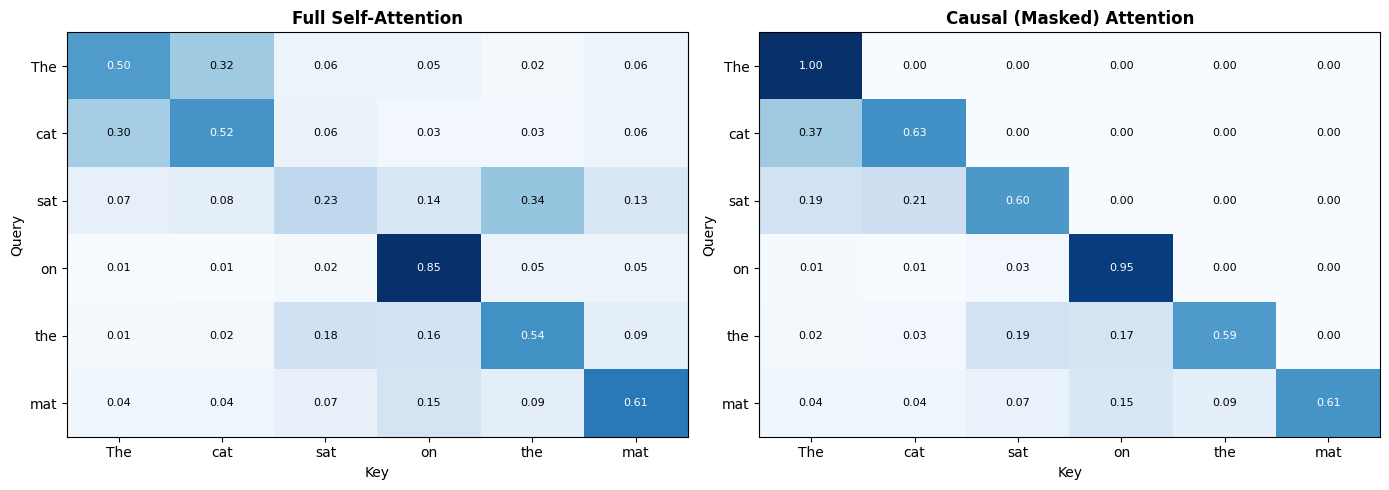

**Notice**: In causal attention, the upper triangle is zeroed out - tokens can only 'see' themselves and previous tokens.

In [7]:
# Compare side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for ax, w, title in zip(axes, [weights, weights_masked], 
                         ["Full Self-Attention", "Causal (Masked) Attention"]):
    im = ax.imshow(w, cmap='Blues', aspect='auto')
    ax.set_xticks(range(len(tokens)))
    ax.set_yticks(range(len(tokens)))
    ax.set_xticklabels(tokens, fontsize=10)
    ax.set_yticklabels(tokens, fontsize=10)
    ax.set_xlabel("Key")
    ax.set_ylabel("Query")
    ax.set_title(title, fontweight='bold')
    
    for i in range(len(tokens)):
        for j in range(len(tokens)):
            color = "white" if w[i, j] > 0.4 else "black"
            ax.text(j, i, f"{w[i, j]:.2f}", ha="center", va="center", 
                   fontsize=8, color=color)

plt.tight_layout()
plt.show()

md("**Notice**: In causal attention, the upper triangle is zeroed out - tokens can only 'see' themselves and previous tokens.")

## 🎯 Summary

### Key Takeaways

1. **Attention Scores** are raw dot-product values (pre-softmax) measuring compatibility
2. **Attention Weights** are normalized probabilities (post-softmax) determining information mixing
3. **Self-Attention** lets every token attend to every other token (bidirectional)
4. **Causal Attention** masks future tokens for autoregressive generation

### Interpretation Tips

- High attention weight ≠ "the model understands this relationship"
- Attention patterns vary across layers and heads
- Use attention visualization for debugging, not as definitive explanation

### Next Steps

- **mini-multihead**: See how multiple attention heads capture different patterns
- **mini-positional**: Understand how position information is added to embeddings